# Case Study - Portfolio Optimization
In this case study, we will build two $10,000 investment portfolios containing four stocks. The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. To build these two portfolios, we will:
1. Import two years of data for four stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results

## Import Packages & Connect to Data

In [1]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import seaborn as sns

In [3]:
# Set start and end date parameters
startdate = '2019-01-01' 
enddate = '2021-12-31'

# List the four stock ticker symbols for our portfolio
stocklist = ['AMD', 'AAPL', 'MSFT', 'ORCL']

# Create an empty dictionary to store our stock info
stocks = {}

# Loop through each stock in the stock_list and return the Adj Close
for i_stock in stocklist:
    stocks[i_stock] = pdr.DataReader(i_stock, 'yahoo', startdate, enddate)[['Adj Close']]

In [7]:
# Examine the 'AMD' Adj Close from the stocks dictionary
stocks['AMD'].head()


,Adj Close
Date,
2019-01-02,18.830000
2019-01-03,17.049999
2019-01-04,19.000000
2019-01-07,20.570000
2019-01-08,20.750000


## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return * 0.25 (equal weighting for each of the four stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [8]:
# Create 'Normalized Return' column for each stock

for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close']
    stock_data['Normalized Return'] = stock_data['Adj Close']/first_adj_close

In [9]:
stocks['AAPL'].head()

,Adj Close,Normalized Return
Date,,
2019-01-02,38.168354,1.000000
2019-01-03,34.366501,0.900393
2019-01-04,35.833580,0.938830
2019-01-07,35.753822,0.936740
2019-01-08,36.435406,0.954597


In [10]:
for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Return'] * 0.25
    
# We are multiplying by 0.25 because we have four stocks in our portfolio

In [11]:
stocks['MSFT'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2019-01-02,97.147690,1.000000,0.250000
2019-01-03,93.573837,0.963212,0.240803
2019-01-04,97.925896,1.008011,0.252003
2019-01-07,98.050781,1.009296,0.252324
2019-01-08,98.761719,1.016614,0.254154


In [12]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [13]:
stocks['ORCL'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,42.513569,1.000000,0.250000,2500.000000
2019-01-03,42.099903,0.990270,0.247567,2475.674486
2019-01-04,43.914398,1.032950,0.258238,2582.375425
2019-01-07,44.610111,1.049315,0.262329,2623.286660
2019-01-08,45.014378,1.058824,0.264706,2647.059444


In [16]:

sns.set_style("whitegrid")

## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [19]:
# Create position_values dictionary
position_value = dict()

for stock_name, stock_data in stocks.items():
    position_value[stock_name] = stock_data['Position Value']

In [21]:
# Convert the position_values dictionary to a DataFrame
position_value = pd.DataFrame(data = position_value)

position_value.head()

In [23]:
# Add 'Total' column to position values, summing the other columns
position_value['Total'] = position_value.sum(axis = 1)

In [24]:
position_value.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2263.674895,2250.981325,2408.030429,2475.674486,9398.361134
2019-01-04,2522.570377,2347.073965,2520.026361,2582.375425,9972.046127
2019-01-07,2731.014309,2341.849893,2523.240167,2623.286660,10219.391030
2019-01-08,2754.912385,2386.493121,2541.535443,2647.059444,10330.000392


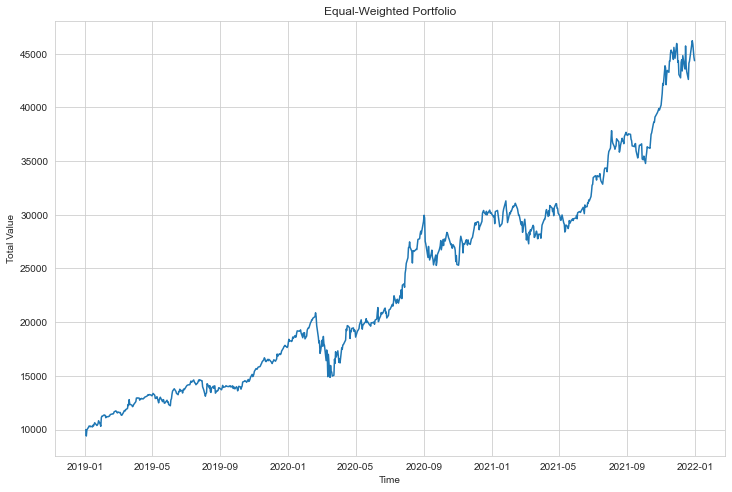

In [28]:
# View the total portfolio
plt.figure(figsize = (12,8))
plt.plot(position_value['Total'])
plt.title('Equal-Weighted Portfolio')
plt.ylabel('Total Value')
plt.xlabel('Time');

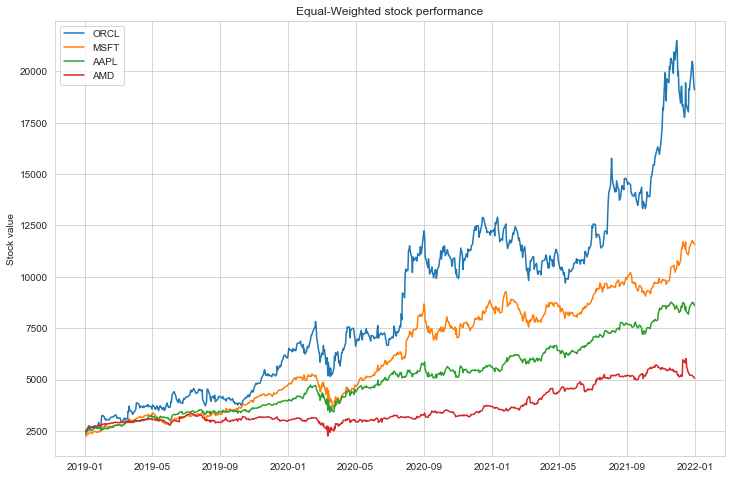

In [36]:
# View the four stocks in the portfolio
plt.figure(figsize = (12, 8))
plt.plot(position_value.iloc[:,0:4])
plt.title('Equal-Weighted stock performance')
plt.ylabel('Stock value')
plt.legend(['ORCL', 'MSFT', 'AAPL', 'AMD']);

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [44]:
# Define the end and start value of the portfolio
end_value = position_value['Total'][-1]
start_value = position_value['Total'][0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value/ start_value - 1

print(cumulative_return)

3.4353424417864593


In [46]:
# Create a 'Daily Returns' column
position_value['Daily Returns'] = position_value['Total'].pct_change()

position_value.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Returns
Date,,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2019-01-03,2263.674895,2250.981325,2408.030429,2475.674486,9398.361134,-0.060164
2019-01-04,2522.570377,2347.073965,2520.026361,2582.375425,9972.046127,0.061041
2019-01-07,2731.014309,2341.849893,2523.240167,2623.286660,10219.391030,0.024804
2019-01-08,2754.912385,2386.493121,2541.535443,2647.059444,10330.000392,0.010823


In [49]:
# Calculate the mean Daily Return 
mean_daily_return = position_value['Daily Returns'].mean()

print('The mean daily return is:', mean_daily_return)

The mean daily return is: 0.0021856508683060403


In [52]:
# Calculate the standard deviation of Daily Return 

stdev_daily_return = position_value['Daily Returns'].std()

print('The std daily return is: ',stdev_daily_return)

The std daily return is:  0.020667540612412324


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us to quantify how much return we are getting for a given level of risk. When comparing two different investments, the asset with the higher sharpe ratio provides a higher return for the same amount of risk or the same return for a lower amount of risk. 

It is calculated by taking the average return of the portfolio, minus a risk free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close 0 so we won't add it to the formula.

In [ ]:
# Calculate the sharpe ratio


In [ ]:
# Calculate the annualized sharpe ratio


## Prepare Scenarios to Optimize Portfolio Weighting
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [ ]:
# Create stock_adj_close dictionary


In [ ]:
# Create stock_returns DataFrames to see the day over day change in stock value


## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [ ]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario


In [ ]:
# Create additional blank arrays for scenario output


In [ ]:
# Import the random package and set the seeds


# Generate four random numbers for each index


# Divide each number by the sum of the numbers to generate the random weight


# Save the weights in weights_array

    
# Calculate the return for each scenario

    
# Calculate the expected volatility for each scenario

    
# Calculate the Sharpe Ratio for each scenario 


In [ ]:
print("The first combination:")

In [ ]:
print("The sharpe ratio of the first portfolio:")

## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [ ]:
# Find the highest sharpe ratio in sharpe_array


In [ ]:
# Find the index of the optimal portfolio


In [ ]:
# Print the optimal weights for each stock


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

In [ ]:
# Visualize volatility vs returns for each scenario


In [ ]:
# Identify the optimal portfolio in the returns and volatility arrays


# Visualize volatility vs returns for each scenario


# Add the optimal portfolio to the visual
